# Predicting Telco Customer Churn

## Exploratory Data Analysis 

In this section, we carry out some visualization and exploratory analysis of our dataset.

### Data and module importation

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset into a pandas dataframe
data = pd.read_csv('Telco.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Visualization and Analysis

Checking for missing values:

In [4]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Great! Looks like we don't have any missing values

Checking the amount of each class for our target variable, Churn:

In [5]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Our data is not terribly imbalanced hence we do not employ any class balancing techniques like SMOTE.

[Text(0.5, 0, 'Frequency')]

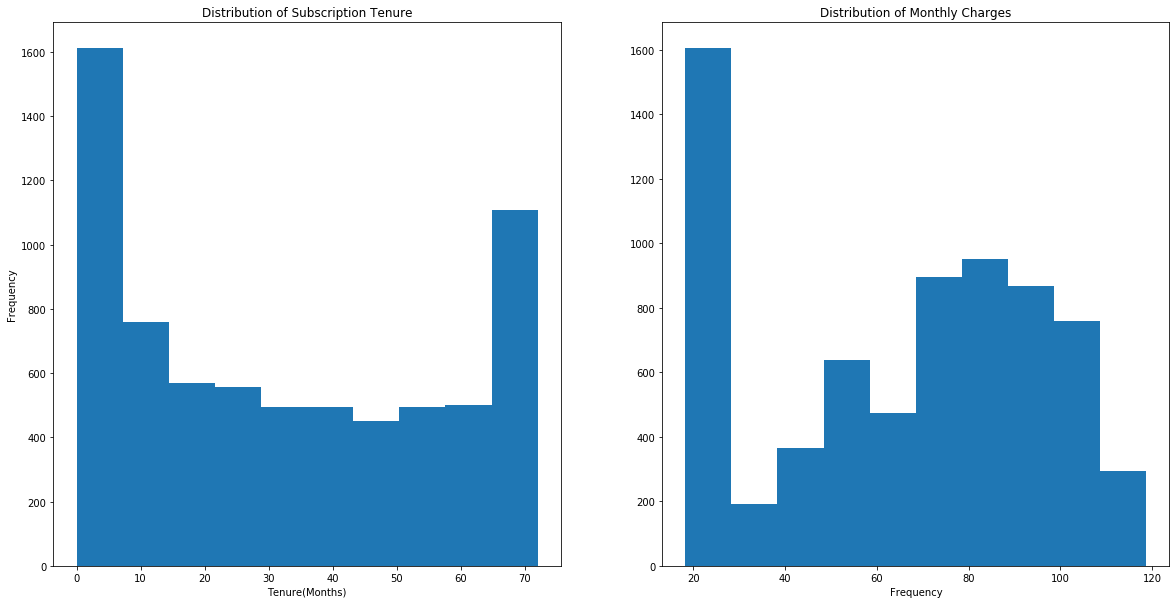

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].hist(data.tenure)
axes[1].hist(data.MonthlyCharges)
axes[0].set_title('Distribution of Subscription Tenure')
axes[1].set_title('Distribution of Monthly Charges')
axes[0].set(xlabel="Tenure(Months)")
axes[0].set(ylabel="Frequency")
axes[1].set(xlabel="Monthly Charges($)")
axes[1].set(xlabel="Frequency")

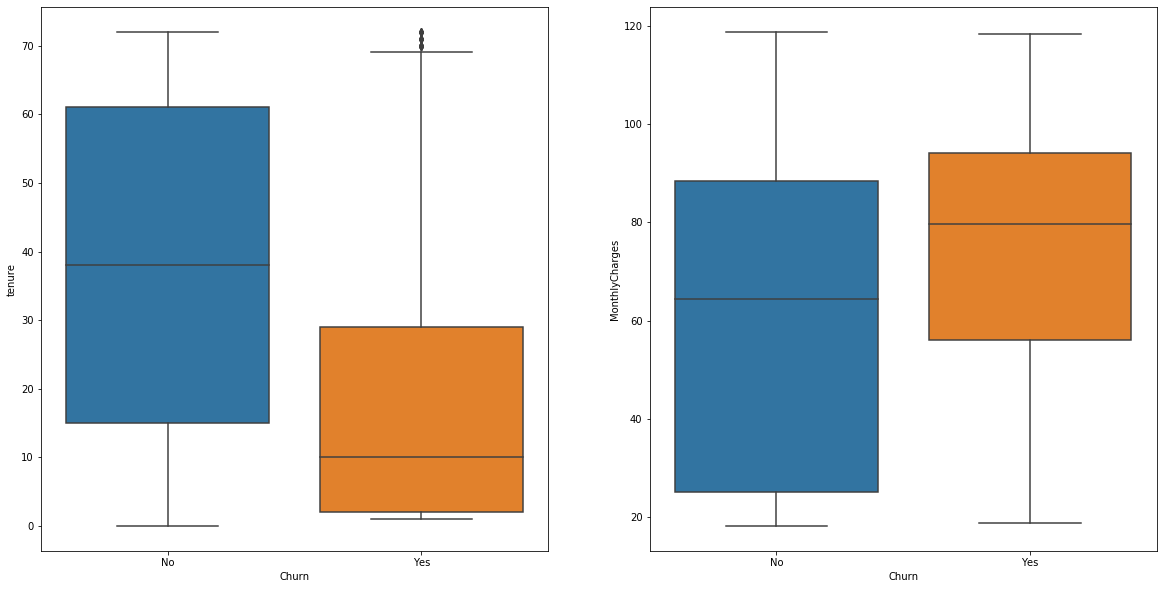

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(x="Churn",y="tenure",data=data,ax=axes[0])
sns.boxplot(x="Churn",y="MonthlyCharges",data=data,ax=axes[1])

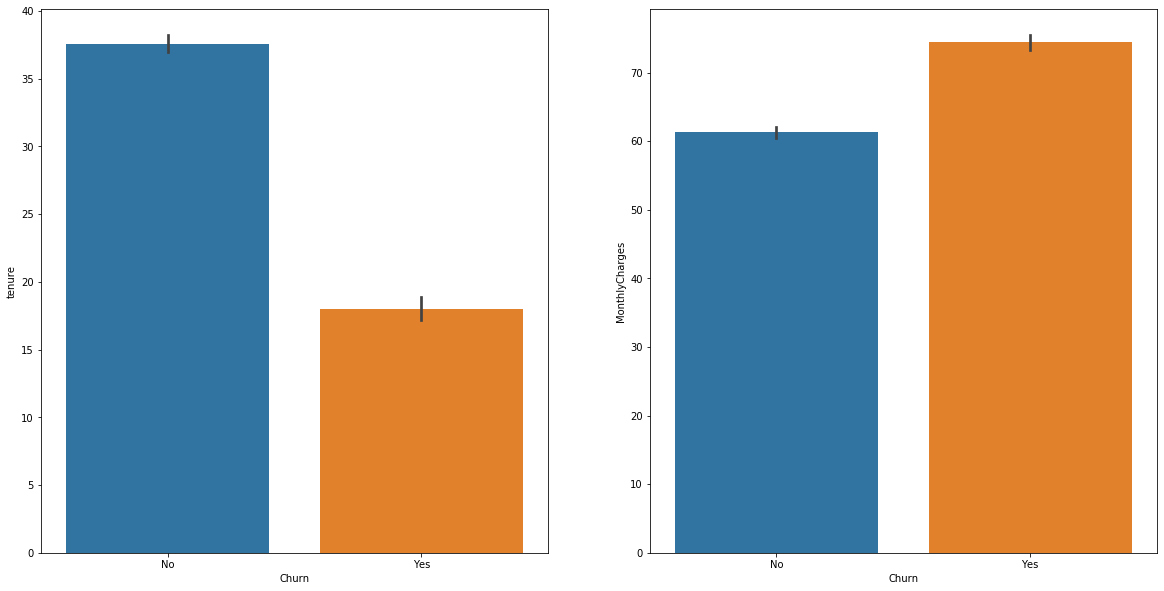

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.barplot(x="Churn",y="tenure",data=data,ax=axes[0])
sns.barplot(x="Churn",y="MonthlyCharges",data=data,ax=axes[1])

In [9]:
data.groupby("gender").mean()

,SeniorCitizen,tenure,MonthlyCharges
gender,,,
Female,0.162844,32.244553,65.204243
Male,0.161463,32.495359,64.327482


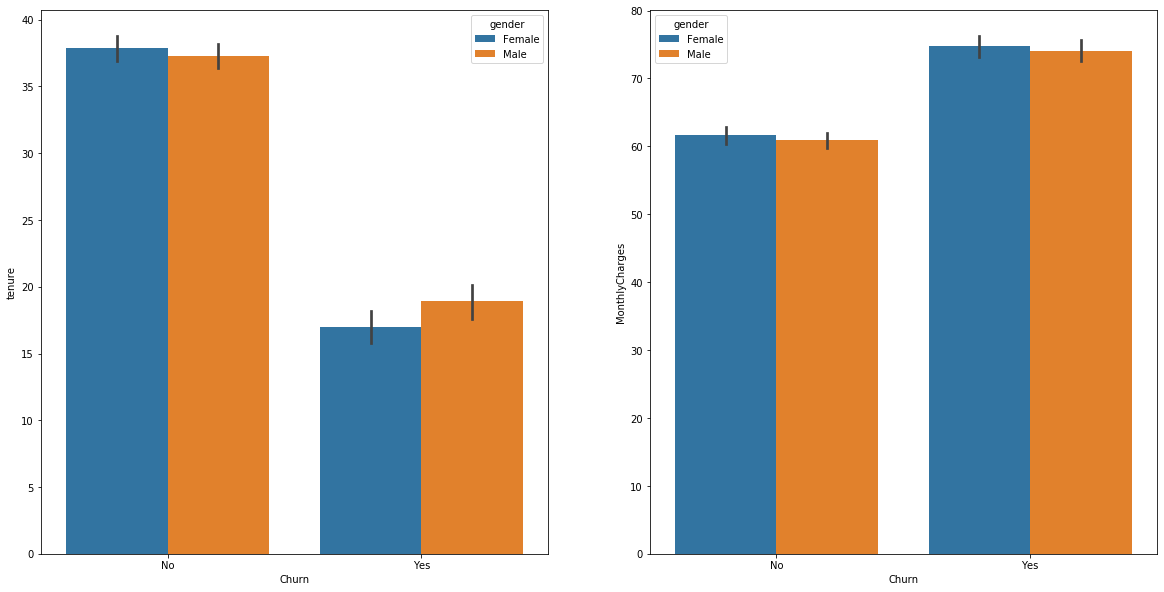

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.barplot(x="Churn",y="tenure",hue="gender",data=data,ax=axes[0])
sns.barplot(x="Churn",y="MonthlyCharges",hue="gender",data=data,ax=axes[1])

## Data Pre-Processing

In this section, we transform our data into a form amenable to machine learning. We encode categorical features, normalize numerical features and perform other necessary pre-processings.

In [11]:
data.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

### Removing Redundant Information

We already have columns which indicate the type of phone service and internet service, or if the person doesn't have phone/internet service. Hence, we can replace the 
entries which say "No phone service" or "No internet service" in other columns such as OnlineSecurity with "No".

In [13]:
def makeNo(x):
    if x == "No internet service" or x=="No phone service":
        return "No"
    else:
        return x
for feature in data.columns:
    data[feature] = data[feature].apply(makeNo)

In [14]:
data.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [15]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Feature Encoding

We encode the categorical variables using the pandas get_dummies function and drop the first category which serves as the base/reference category.

In [16]:
binary = []
for col in data.columns:
    if len(data[col].unique())==2:
        binary.append(col)

In [17]:
def enCode(x):
    if x=="Yes":
        return 1
    else:
        return 0
for b in binary:
    
    data[b] = data[b].apply(enCode)

In [18]:
data.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [19]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


Then we carry out feature encoding for the non-binary categorical features

In [20]:
InternetService_ = pd.get_dummies(data['InternetService'],drop_first=True)
Contract_ = pd.get_dummies(data['Contract'],drop_first=True)
PaymentMethod_ = pd.get_dummies(data['PaymentMethod'],drop_first=True)

In [21]:
df = pd.concat([data, InternetService_, Contract_,  PaymentMethod_],axis=1)

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,Fiber optic,No,One year,Two year,Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,56.95,1889.5,0,0,0,1,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,53.85,108.15,1,0,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,DSL,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [23]:
df.drop(["InternetService","Contract", "PaymentMethod"], axis=1, inplace=True)

In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Fiber optic,No,One year,Two year,Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,29.85,29.85,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,56.95,1889.5,0,0,0,1,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,53.85,108.15,1,0,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [25]:
df.drop(["customerID"], axis=1, inplace=True)

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,Fiber optic,No,One year,Two year,Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.5,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


### Feature Scaling

Here we normalize the numerical features so we can have less biased results when we apply SVM and to speed up convergence when we optimize our neural network.

Let us check the variable type for our different features and coerce them to float or int type where necessary.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
gender                     7043 non-null int64
SeniorCitizen              7043 non-null int64
Partner                    7043 non-null int64
Dependents                 7043 non-null int64
tenure                     7043 non-null int64
PhoneService               7043 non-null int64
MultipleLines              7043 non-null int64
OnlineSecurity             7043 non-null int64
OnlineBackup               7043 non-null int64
DeviceProtection           7043 non-null int64
TechSupport                7043 non-null int64
StreamingTV                7043 non-null int64
StreamingMovies            7043 non-null int64
PaperlessBilling           7043 non-null int64
MonthlyCharges             7043 non-null float64
TotalCharges               7043 non-null object
Churn                      7043 non-null int64
Fiber optic                7043 non-null uint8
No                         7043 non-null uin

We see that the TotalCharges column is not of numeric type so we coerce it to float in order to use this column for computations.

In [28]:
total=[]
for i in range(df.shape[0]):
    total.append(round(df.tenure[i]*df.MonthlyCharges[i],2))

df.TotalCharges = total
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
gender                     7043 non-null int64
SeniorCitizen              7043 non-null int64
Partner                    7043 non-null int64
Dependents                 7043 non-null int64
tenure                     7043 non-null int64
PhoneService               7043 non-null int64
MultipleLines              7043 non-null int64
OnlineSecurity             7043 non-null int64
OnlineBackup               7043 non-null int64
DeviceProtection           7043 non-null int64
TechSupport                7043 non-null int64
StreamingTV                7043 non-null int64
StreamingMovies            7043 non-null int64
PaperlessBilling           7043 non-null int64
MonthlyCharges             7043 non-null float64
TotalCharges               7043 non-null float64
Churn                      7043 non-null int64
Fiber optic                7043 non-null uint8
No                         7043 non-null ui

In [29]:
numeric = ["tenure", "MonthlyCharges", "TotalCharges"]

In [30]:
max(df["tenure"])

72

We carry out Min-Max scaling in the following block of code:

In [31]:
#Min-Max scaling
for feature in numeric:
    scaled=[]
    lo, hi = min(df[feature]), max(df[feature])
    for i in range(df.shape[0]):
        x = (df[feature][i]-lo)/(hi-lo)
        scaled.append(round(x,2))
    df[feature] = scaled

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,Fiber optic,No,One year,Two year,Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,0.01,0,0,0,1,0,...,0.12,0.00,0,0,0,0,0,0,1,0
1,0,0,0,0,0.47,1,0,1,0,1,...,0.39,0.23,0,0,0,1,0,0,0,1
2,0,0,0,0,0.03,1,0,1,1,0,...,0.35,0.01,1,0,0,0,0,0,0,1
3,0,0,0,0,0.62,0,0,1,0,1,...,0.24,0.22,0,0,0,1,0,0,0,0
4,0,0,0,0,0.03,1,0,0,0,0,...,0.52,0.02,1,1,0,0,0,0,1,0


## Dataset Split

In this section, we split our data into train, validation, and test sets using a ratio of 70-20-10.

In [33]:
y = df["Churn"]

In [34]:
X = df.drop(["Churn"], axis=1)

In [35]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Fiber optic,No,One year,Two year,Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,0.01,0,0,0,1,0,...,1,0.12,0.00,0,0,0,0,0,1,0
1,0,0,0,0,0.47,1,0,1,0,1,...,0,0.39,0.23,0,0,1,0,0,0,1
2,0,0,0,0,0.03,1,0,1,1,0,...,1,0.35,0.01,0,0,0,0,0,0,1
3,0,0,0,0,0.62,0,0,1,0,1,...,0,0.24,0.22,0,0,1,0,0,0,0
4,0,0,0,0,0.03,1,0,0,0,0,...,1,0.52,0.02,1,0,0,0,0,1,0


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 46)

In [38]:
#Further Splitting the test set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=0.333, random_state =100)

In [39]:
print(y_test.shape)

(704,)


## Predicting Churn

In this section we predict customer churn using SVM, logistic regression, and multilayer perceptron classification techniques.

### Support Vector Machine (SVM)

In [40]:
#Importing the module
from sklearn.svm import SVC

In [41]:
#Importing come model evaluation tools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Training and Validation

In the following block of code, we train and validate our model using the different values of the regularization parameter C.

In [42]:
C_vals = [10**x for x in range(-4,5)] #Values of C
results, train_accuracy, val_accuracy = {},[],[]
for i in range(len(C_vals)):
    model = SVC(C=C_vals[i])
    model.fit(X_train,y_train) #Model training
    predictions = model.predict(X_train) #Prediction on training set
    train_accuracy.append(accuracy_score(y_train,predictions))
    predictions = model.predict(X_val) #Prediction on validation set
    val_accuracy.append(accuracy_score(y_val,predictions))

results["C"], results["Training Accuracy"], results["Validation Accuracy"] = C_vals,train_accuracy,val_accuracy
results = pd.DataFrame(results,columns=["C","Training Accuracy","Validation Accuracy"])

In [53]:
results

,C,Training Accuracy,Validation Accuracy
0,0.0001,0.734077,0.731015
1,0.0010,0.734077,0.731015
2,0.0100,0.734077,0.731015
3,0.1000,0.796755,0.797019
4,1.0000,0.811765,0.804116
5,10.0000,0.854158,0.791341
6,100.0000,0.911359,0.761533
7,1000.0000,0.927586,0.739532
8,10000.0000,0.941785,0.738822


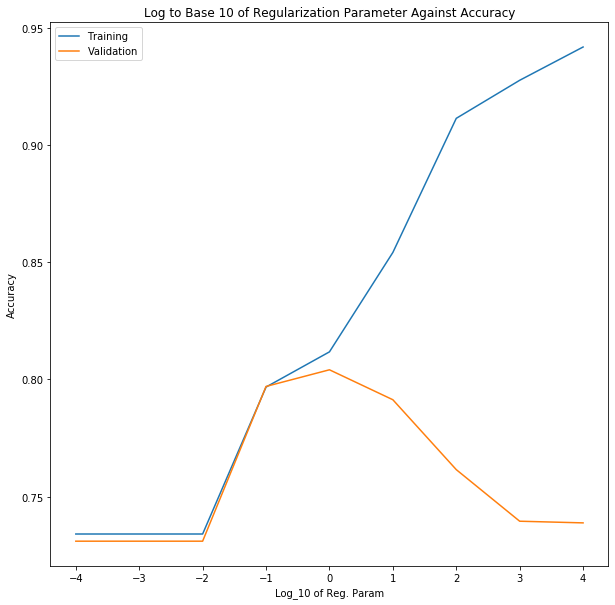

In [62]:
powers = [x for x in range(-4,5)] #log_10 values of C
#Plotting the accuracies
plt.figure(figsize=(10,10))
plt.plot(powers,train_accuracy,label="Training")
plt.plot(powers,val_accuracy,label="Validation")
plt.xlabel("Log_10 of Reg. Param")
plt.ylabel("Accuracy")
plt.title("Log to Base 10 of Regularization Parameter Against Accuracy")
plt.legend(loc="upper left")

#### Testing

We yield our best accuracy when $C=10^0 = 1$, therefore we use this value of C for testing.

In [179]:
model = SVC(C=1)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
x = 100*accuracy_score(y_test,predictions)
x=round(x,2)
print("Test Accuracy for SVM is", x,"%")

Test Accuracy for SVM is 80.11 %


### Logistic Regression